# Convolution Assignment



**Downloading the data**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pcb0311","key":"0ea58a8063ae198bcbc5b75321557b5e"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats
     

 99% 805M/812M [00:08<00:00, 129MB/s]
100% 812M/812M [00:08<00:00, 97.1MB/s]


In [ ]:
!unzip -qq dogs-vs-cats.zip

In [ ]:
!unzip -qq train.zip

**Copying images to training, validation, and test directories**

In [ ]:
import os, shutil, pathlib
import warnings
warnings.filterwarnings('ignore')

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

# **Training the convent network from scratch**

**Model 1:Training sample of 1000, a validation sample of 500, and a test sample of 500**

In [ ]:
make_subset("test", start_index=0, end_index=500)
make_subset("validation", start_index=500, end_index=1000)
make_subset("train", start_index=1000, end_index=2000)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Data preprocessing**

**Using image_dataset_from_directory to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the Dataset**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 18s 77ms/step - loss: 0.7119 - accuracy: 0.5060 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 6s 86ms/step - loss: 0.6941 - accuracy: 0.5275 - val_loss: 0.6853 - val_accuracy: 0.5600
Epoch 3/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6962 - accuracy: 0.5865 - val_loss: 0.6854 - val_accuracy: 0.5680
Epoch 4/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6541 - accuracy: 0.6160 - val_loss: 0.6557 - val_accuracy: 0.6150
Epoch 5/30
63/63 [==============================] - 5s 76ms/step - loss: 0.6421 - accuracy: 0.6395 - val_loss: 0.6493 - val_accuracy: 0.6240
Epoch 6/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6109 - accuracy: 0.6565 - val_loss: 0.7390 - val_accuracy: 0.6000
Epoch 7/30
63/63 [==============================] - 4s 64ms/step - loss: 0.5861 - accuracy: 0.6870 - val_loss: 0.6735 - val_accuracy: 0.6300
Epoch 8/30
6

**Displaying curves of loss and accuracy during training**

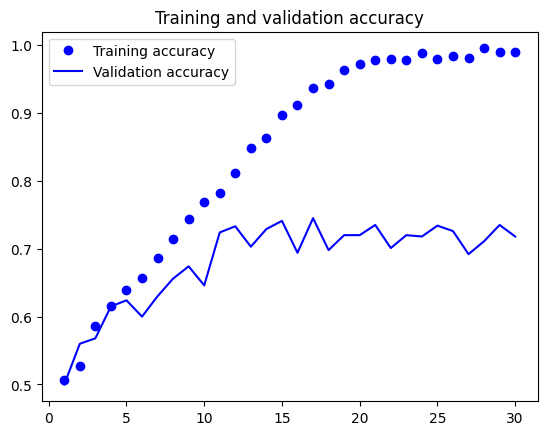

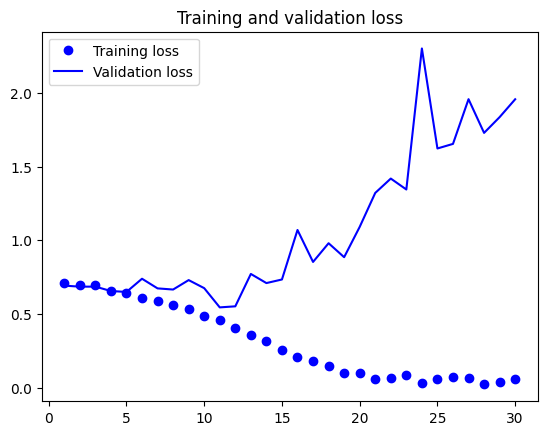

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 32ms/step - loss: 0.5297 - accuracy: 0.7500
Test accuracy: 0.750


**Model 1a: Using Data Augmentation**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
     callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 66ms/step - loss: 0.7032 - accuracy: 0.5045 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 5s 81ms/step - loss: 0.6936 - accuracy: 0.5110 - val_loss: 0.6913 - val_accuracy: 0.5240
Epoch 3/30
63/63 [==============================] - 4s 63ms/step - loss: 0.6941 - accuracy: 0.5270 - val_loss: 0.6785 - val_accuracy: 0.6060
Epoch 4/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6973 - accuracy: 0.5740 - val_loss: 0.6731 - val_accuracy: 0.5780
Epoch 5/30
63/63 [==============================] - 5s 78ms/step - loss: 0.6787 - accuracy: 0.5995 - val_loss: 0.6488 - val_accuracy: 0.6210
Epoch 6/30
63/63 [==============================] - 5s 79ms/step - loss: 0.6548 - accuracy: 0.6195 - val_loss: 0.6866 - val_accuracy: 0.5460
Epoch 7/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6457 - accuracy: 0.6215 - val_loss: 0.6096 - val_accuracy: 0.6710
Epoch 8/30
63

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.4133 - accuracy: 0.8300
Test accuracy: 0.830


**Defining a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

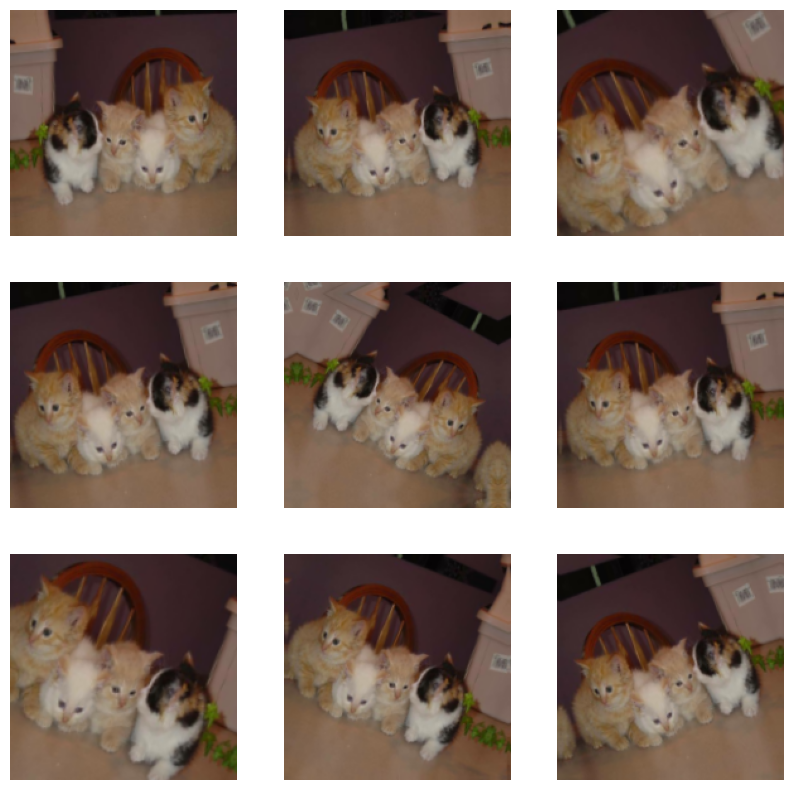

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Model 1b: Using Dropout Method**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 65ms/step - loss: 0.7227 - accuracy: 0.4915 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6946 - accuracy: 0.5135 - val_loss: 0.6886 - val_accuracy: 0.5670
Epoch 3/30
63/63 [==============================] - 5s 79ms/step - loss: 0.6855 - accuracy: 0.5635 - val_loss: 0.6732 - val_accuracy: 0.5850
Epoch 4/30
63/63 [==============================] - 5s 75ms/step - loss: 0.6611 - accuracy: 0.6030 - val_loss: 0.6517 - val_accuracy: 0.6050
Epoch 5/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6413 - accuracy: 0.6380 - val_loss: 0.6421 - val_accuracy: 0.6330
Epoch 6/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6215 - accuracy: 0.6590 - val_loss: 0.6179 - val_accuracy: 0.6530
Epoch 7/30
63/63 [==============================] - 5s 76ms/step - loss: 0.6070 - accuracy: 0.6765 - val_loss: 0.5959 - val_accuracy: 0.6660
Epoch 8/30
63

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.5218 - accuracy: 0.7590
Test accuracy: 0.759


**Model 1c: Using both Data Augmentation and Dropout mthod**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 81ms/step - loss: 0.6960 - accuracy: 0.5165 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 4s 65ms/step - loss: 0.6937 - accuracy: 0.5055 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 6s 89ms/step - loss: 0.6942 - accuracy: 0.5555 - val_loss: 0.6792 - val_accuracy: 0.5850
Epoch 4/30
63/63 [==============================] - 4s 63ms/step - loss: 0.6826 - accuracy: 0.5745 - val_loss: 1.4822 - val_accuracy: 0.5000
Epoch 5/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6722 - accuracy: 0.6150 - val_loss: 0.6532 - val_accuracy: 0.6450
Epoch 6/30
63/63 [==============================] - 5s 80ms/step - loss: 0.6614 - accuracy: 0.6080 - val_loss: 0.6537 - val_accuracy: 0.6130
Epoch 7/30
63/63 [==============================] - 6s 88ms/step - loss: 0.6441 - accuracy: 0.6225 - val_loss: 0.7001 - val_accuracy: 0.6130
Epoch 8/30
63

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 45ms/step - loss: 0.4343 - accuracy: 0.8090
Test accuracy: 0.809


**Model 2) Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?**





In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory


make_subset("train_1", start_index=0, end_index=5000)
make_subset("validation_1", start_index=5000, end_index=5500)
make_subset("test_1", start_index=5500, end_index=6000)

train_dataset_1 = image_dataset_from_directory(
    new_base_dir / "train_1",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_1 = image_dataset_from_directory(
    new_base_dir / "validation_1",
    image_size=(180, 180),
    batch_size=32)
test_dataset_1 = image_dataset_from_directory(
    new_base_dir / "test_1",
    image_size=(180, 180),
    batch_size=32)

Found 10000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import regularizers

# used early stopping to stop optimization when it isn't helping any more. 
early_stopping_monitor = EarlyStopping(patience=10)

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


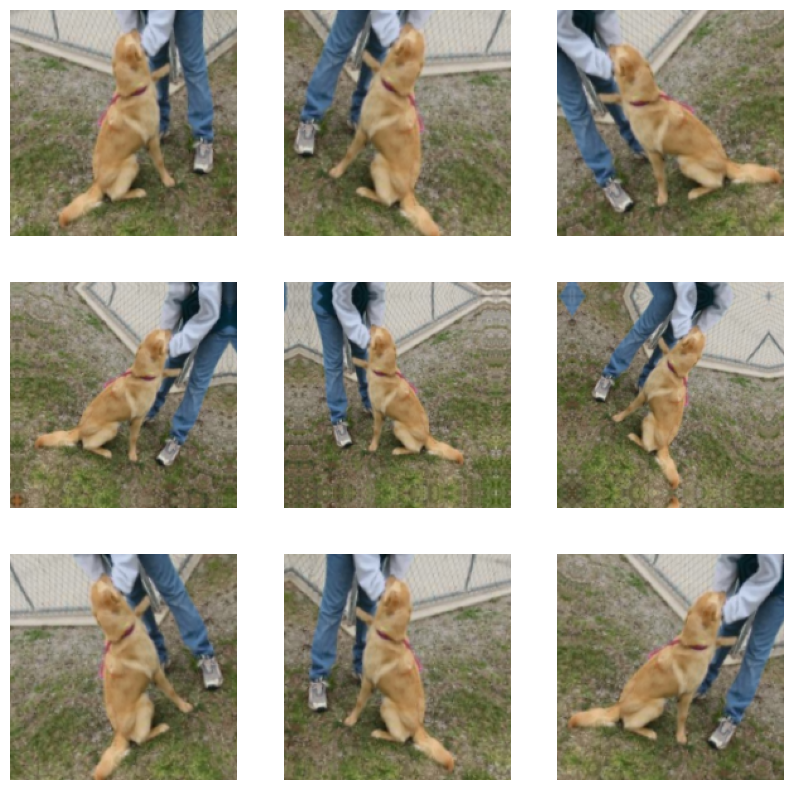

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
history = model.fit(
    train_dataset_1,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 19s 53ms/step - loss: 0.6848 - accuracy: 0.5617 - val_loss: 0.7183 - val_accuracy: 0.5250
Epoch 2/30
313/313 [==============================] - 18s 57ms/step - loss: 0.6081 - accuracy: 0.6694 - val_loss: 0.6047 - val_accuracy: 0.6990
Epoch 3/30
313/313 [==============================] - 18s 55ms/step - loss: 0.5285 - accuracy: 0.7388 - val_loss: 0.4593 - val_accuracy: 0.8030
Epoch 4/30
313/313 [==============================] - 17s 55ms/step - loss: 0.4611 - accuracy: 0.7809 - val_loss: 0.4226 - val_accuracy: 0.8040
Epoch 5/30
313/313 [==============================] - 17s 52ms/step - loss: 0.4015 - accuracy: 0.8180 - val_loss: 0.3282 - val_accuracy: 0.8560
Epoch 6/30
313/313 [==============================] - 18s 55ms/step - loss: 0.3456 - accuracy: 0.8480 - val_loss: 0.2415 - val_accuracy: 0.8990
Epoch 7/30
313/313 [==============================] - 16s 52ms/step - loss: 0.2997 - accuracy: 0.8709 - val_loss: 0.2595 - val_accuracy:

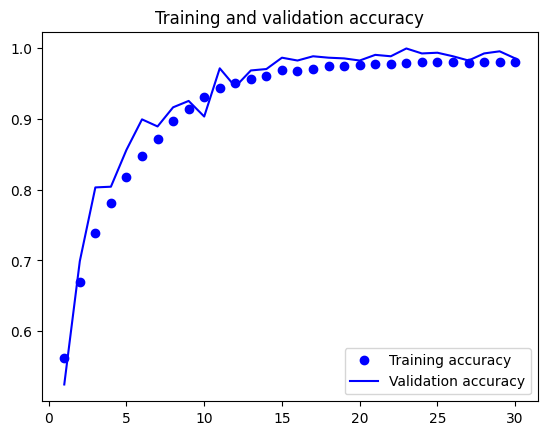

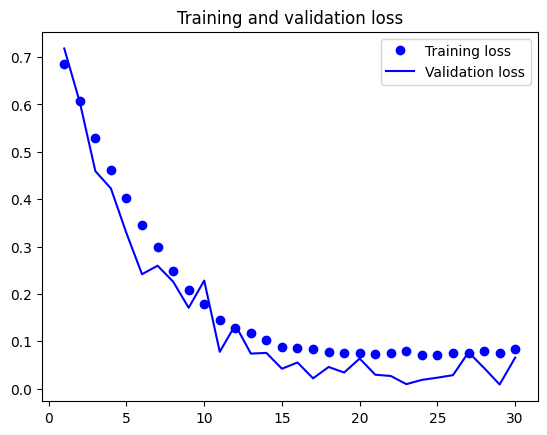

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_1)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.8913 - accuracy: 0.8930
Test accuracy: 0.893


**Model 3: Increasing the Training sample size to 10000**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory


make_subset("train_4", start_index=0, end_index=10000)
make_subset("validation_4", start_index=10000, end_index=10500)
make_subset("test_4", start_index=10500, end_index=11000)

train_dataset_4 = image_dataset_from_directory(
    new_base_dir / "train_4",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_4 = image_dataset_from_directory(
    new_base_dir / "validation_4",
    image_size=(180, 180),
    batch_size=32)
test_dataset_4 = image_dataset_from_directory(
    new_base_dir / "test_4",
    image_size=(180, 180),
    batch_size=32)

Found 20000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


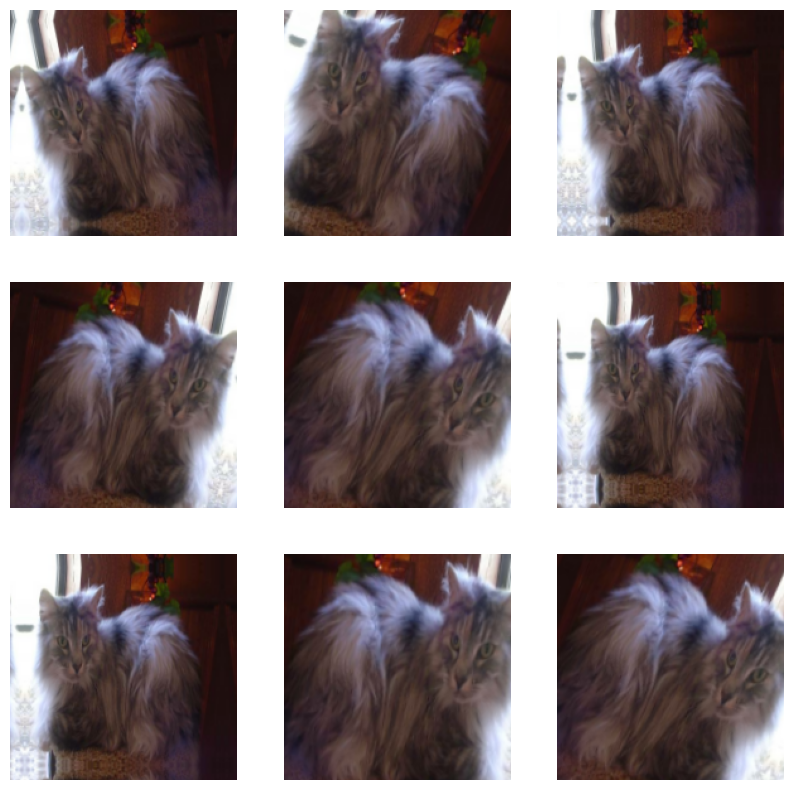

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
history = model.fit(
    train_dataset_4,
    epochs=30,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 74s 115ms/step - loss: 0.0999 - accuracy: 0.9663 - val_loss: 0.1443 - val_accuracy: 0.9780
Epoch 2/30
625/625 [==============================] - 72s 114ms/step - loss: 0.0885 - accuracy: 0.9710 - val_loss: 0.1558 - val_accuracy: 0.9730
Epoch 3/30
625/625 [==============================] - 72s 114ms/step - loss: 0.0834 - accuracy: 0.9730 - val_loss: 0.1994 - val_accuracy: 0.9680
Epoch 4/30
625/625 [==============================] - 74s 118ms/step - loss: 0.0806 - accuracy: 0.9756 - val_loss: 0.1637 - val_accuracy: 0.9770
Epoch 5/30
625/625 [==============================] - 72s 115ms/step - loss: 0.0725 - accuracy: 0.9770 - val_loss: 0.1591 - val_accuracy: 0.9820
Epoch 6/30
625/625 [==============================] - 72s 114ms/step - loss: 0.0740 - accuracy: 0.9785 - val_loss: 0.1449 - val_accuracy: 0.9790
Epoch 7/30
625/625 [==============================] - 72s 114ms/step - loss: 0.0702 - accuracy: 0.9777 - val_loss: 0.1721 - val_ac

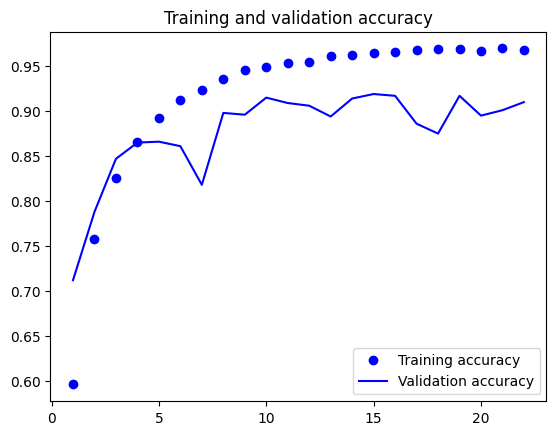

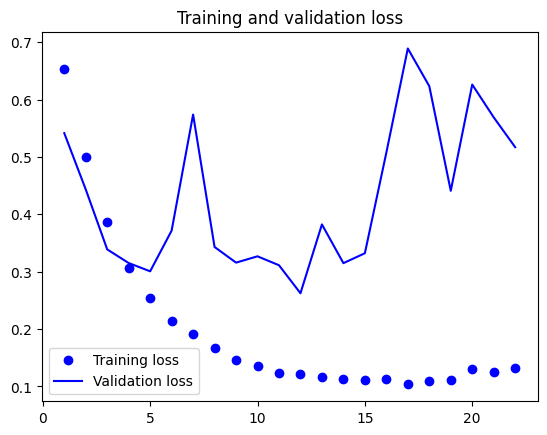

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_4)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 32ms/step - loss: 0.2858 - accuracy: 0.9030
Test accuracy: 0.903


**Feature extraction together with data augmentation**

**Instantiating and freezing the VGG16 convolutional base**

**Pre-Trained Model - 1000 Training samples**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 19s 204ms/step - loss: 3.7083 - accuracy: 0.7605 - val_loss: 0.8708 - val_accuracy: 0.9100
Epoch 2/30
63/63 [==============================] - 12s 193ms/step - loss: 1.0318 - accuracy: 0.8840 - val_loss: 0.5052 - val_accuracy: 0.9450
Epoch 3/30
63/63 [==============================] - 12s 194ms/step - loss: 0.6660 - accuracy: 0.9075 - val_loss: 0.3819 - val_accuracy: 0.9580
Epoch 4/30
63/63 [==============================] - 12s 194ms/step - loss: 0.4186 - accuracy: 0.9365 - val_loss: 0.2863 - val_accuracy: 0.9560
Epoch 5/30
63/63 [==============================] - 12s 194ms/step - loss: 0.2722 - accuracy: 0.9415 - val_loss: 0.2323 - val_accuracy: 0.9590
Epoch 6/30
63/63 [==============================] - 12s 189ms/step - loss: 0.2067 - accuracy: 0.9505 - val_loss: 0.2346 - val_accuracy: 0.9620
Epoch 7/30
63/63 [==============================] - 10s 160ms/step - loss: 0.2100 - accuracy: 0.9565 - val_loss: 0.2011 - val_accuracy: 0.9650

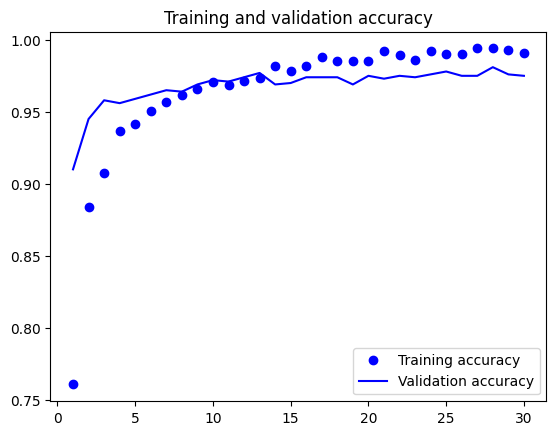

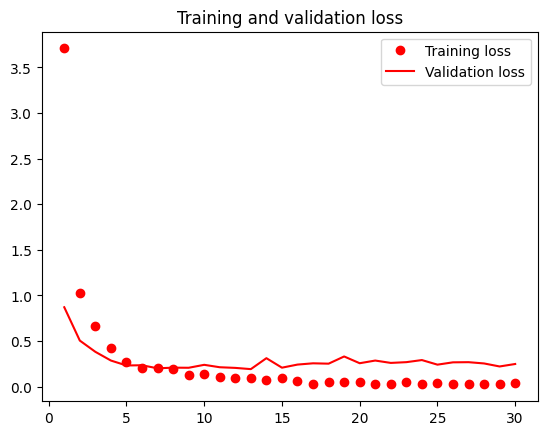

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 87ms/step - loss: 0.1919 - accuracy: 0.9790
Test accuracy: 0.979


**Pre-Trained Model - 5000 Training samples**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset_1,
    epochs=10,
    validation_data=validation_dataset_1,
    callbacks=callbacks)

Epoch 1/10
313/313 [==============================] - 40s 120ms/step - loss: 1.3285 - accuracy: 0.8718 - val_loss: 0.1794 - val_accuracy: 0.9630
Epoch 2/10
313/313 [==============================] - 38s 120ms/step - loss: 0.2468 - accuracy: 0.9331 - val_loss: 0.1099 - val_accuracy: 0.9720
Epoch 3/10
313/313 [==============================] - 38s 120ms/step - loss: 0.1606 - accuracy: 0.9495 - val_loss: 0.0961 - val_accuracy: 0.9710
Epoch 4/10
313/313 [==============================] - 37s 118ms/step - loss: 0.1191 - accuracy: 0.9579 - val_loss: 0.1023 - val_accuracy: 0.9750
Epoch 5/10
313/313 [==============================] - 37s 118ms/step - loss: 0.1084 - accuracy: 0.9672 - val_loss: 0.1482 - val_accuracy: 0.9680
Epoch 6/10
313/313 [==============================] - 37s 118ms/step - loss: 0.0910 - accuracy: 0.9712 - val_loss: 0.1293 - val_accuracy: 0.9790
Epoch 7/10
313/313 [==============================] - 37s 118ms/step - loss: 0.0823 - accuracy: 0.9701 - val_loss: 0.1598 - val_ac

In [ ]:
model = keras.models.load_model("fine_tuning2.keras")
test_loss, test_acc = model.evaluate(test_dataset_1)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 88ms/step - loss: 0.1381 - accuracy: 0.9730
Test accuracy: 0.973


**Pre-Trained Model - 10000 samples**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset_4,
    epochs=10,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/10
625/625 [==============================] - 77s 119ms/step - loss: 0.7467 - accuracy: 0.9033 - val_loss: 0.1679 - val_accuracy: 0.9660
Epoch 2/10
625/625 [==============================] - 74s 118ms/step - loss: 0.1456 - accuracy: 0.9492 - val_loss: 0.1527 - val_accuracy: 0.9720
Epoch 3/10
625/625 [==============================] - 72s 114ms/step - loss: 0.1140 - accuracy: 0.9613 - val_loss: 0.1329 - val_accuracy: 0.9760
Epoch 4/10
625/625 [==============================] - 72s 114ms/step - loss: 0.1000 - accuracy: 0.9675 - val_loss: 0.1659 - val_accuracy: 0.9750
Epoch 5/10
625/625 [==============================] - 72s 114ms/step - loss: 0.0845 - accuracy: 0.9699 - val_loss: 0.2172 - val_accuracy: 0.9720
Epoch 6/10
625/625 [==============================] - 71s 114ms/step - loss: 0.0850 - accuracy: 0.9727 - val_loss: 0.1846 - val_accuracy: 0.9730
Epoch 7/10
625/625 [==============================] - 72s 114ms/step - loss: 0.0803 - accuracy: 0.9747 - val_loss: 0.1721 - val_ac

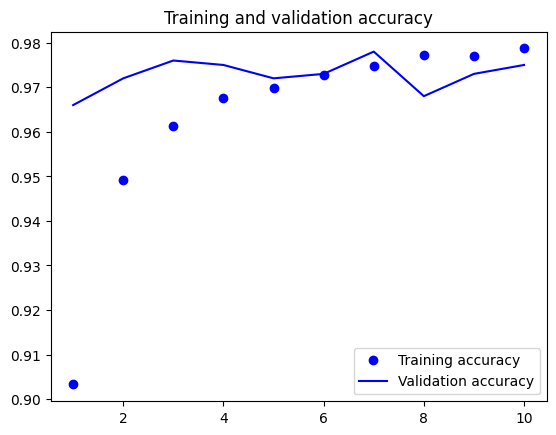

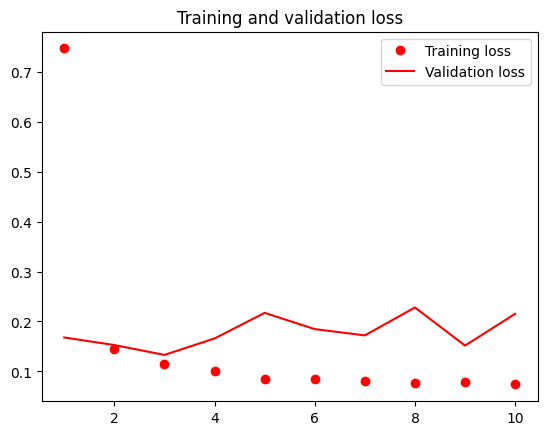

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("fine_tuning3.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 87ms/step - loss: 0.0719 - accuracy: 0.9810
Test accuracy: 0.981


# Convolution Neural Networks(CNN)



**Downloading the data**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pcb0311","key":"0ea58a8063ae198bcbc5b75321557b5e"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats
     

 99% 805M/812M [00:08<00:00, 129MB/s]
100% 812M/812M [00:08<00:00, 97.1MB/s]


In [ ]:
!unzip -qq dogs-vs-cats.zip

In [ ]:
!unzip -qq train.zip

**Copying images to training, validation, and test directories**

In [ ]:
import os, shutil, pathlib
import warnings
warnings.filterwarnings('ignore')

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

# **Training the convent network from scratch**

**Model 1:Training sample of 1000, a validation sample of 500, and a test sample of 500**

In [ ]:
make_subset("test", start_index=0, end_index=500)
make_subset("validation", start_index=500, end_index=1000)
make_subset("train", start_index=1000, end_index=2000)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Data preprocessing**

**Using image_dataset_from_directory to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the Dataset**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a Dataset**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 18s 77ms/step - loss: 0.7119 - accuracy: 0.5060 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 6s 86ms/step - loss: 0.6941 - accuracy: 0.5275 - val_loss: 0.6853 - val_accuracy: 0.5600
Epoch 3/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6962 - accuracy: 0.5865 - val_loss: 0.6854 - val_accuracy: 0.5680
Epoch 4/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6541 - accuracy: 0.6160 - val_loss: 0.6557 - val_accuracy: 0.6150
Epoch 5/30
63/63 [==============================] - 5s 76ms/step - loss: 0.6421 - accuracy: 0.6395 - val_loss: 0.6493 - val_accuracy: 0.6240
Epoch 6/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6109 - accuracy: 0.6565 - val_loss: 0.7390 - val_accuracy: 0.6000
Epoch 7/30
63/63 [==============================] - 4s 64ms/step - loss: 0.5861 - accuracy: 0.6870 - val_loss: 0.6735 - val_accuracy: 0.6300
Epoch 8/30
6

**Displaying curves of loss and accuracy during training**

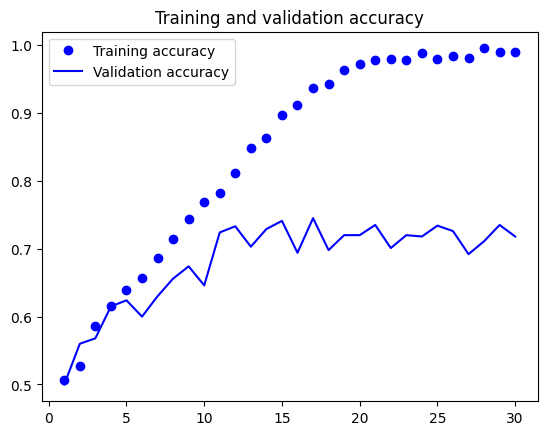

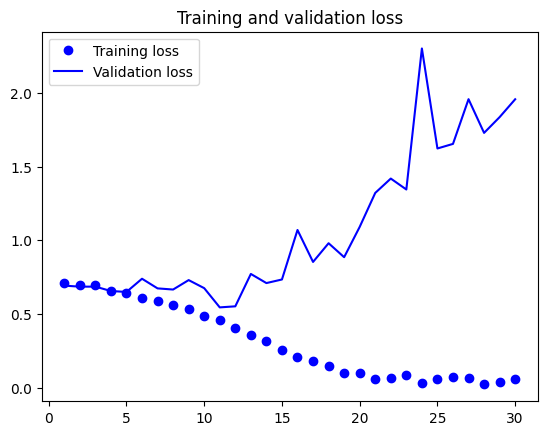

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 32ms/step - loss: 0.5297 - accuracy: 0.7500
Test accuracy: 0.750


To improve performance in developing a network that we trained from scratch, we will train our model on following techniques.

**Model 1a: Using Data Augmentation**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
     callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 66ms/step - loss: 0.7032 - accuracy: 0.5045 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 5s 81ms/step - loss: 0.6936 - accuracy: 0.5110 - val_loss: 0.6913 - val_accuracy: 0.5240
Epoch 3/30
63/63 [==============================] - 4s 63ms/step - loss: 0.6941 - accuracy: 0.5270 - val_loss: 0.6785 - val_accuracy: 0.6060
Epoch 4/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6973 - accuracy: 0.5740 - val_loss: 0.6731 - val_accuracy: 0.5780
Epoch 5/30
63/63 [==============================] - 5s 78ms/step - loss: 0.6787 - accuracy: 0.5995 - val_loss: 0.6488 - val_accuracy: 0.6210
Epoch 6/30
63/63 [==============================] - 5s 79ms/step - loss: 0.6548 - accuracy: 0.6195 - val_loss: 0.6866 - val_accuracy: 0.5460
Epoch 7/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6457 - accuracy: 0.6215 - val_loss: 0.6096 - val_accuracy: 0.6710
Epoch 8/30
63

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.4133 - accuracy: 0.8300
Test accuracy: 0.830


**Defining a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

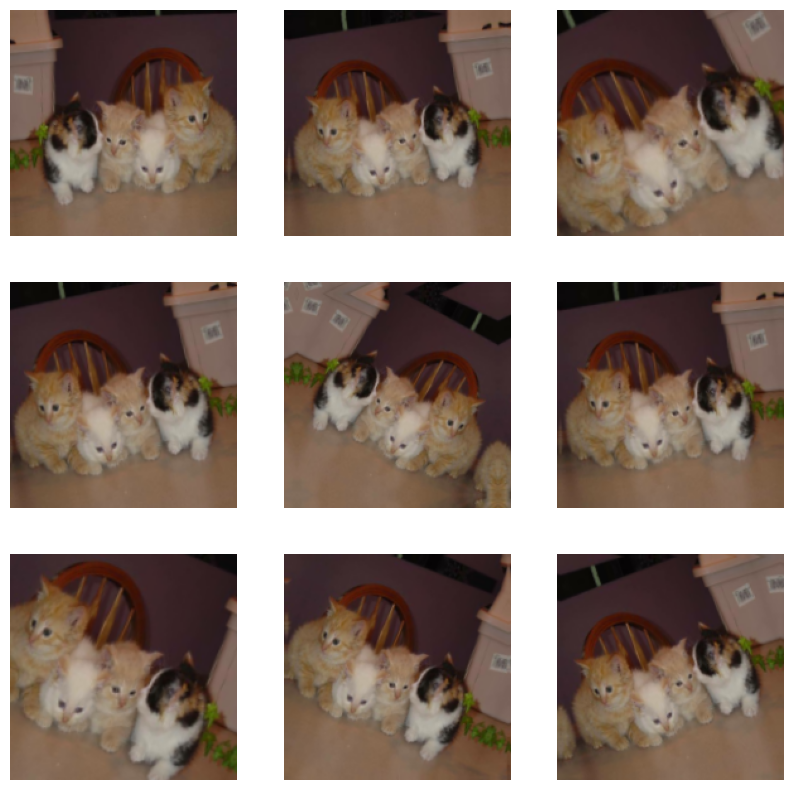

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Model 1b: Using Dropout Method**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 65ms/step - loss: 0.7227 - accuracy: 0.4915 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6946 - accuracy: 0.5135 - val_loss: 0.6886 - val_accuracy: 0.5670
Epoch 3/30
63/63 [==============================] - 5s 79ms/step - loss: 0.6855 - accuracy: 0.5635 - val_loss: 0.6732 - val_accuracy: 0.5850
Epoch 4/30
63/63 [==============================] - 5s 75ms/step - loss: 0.6611 - accuracy: 0.6030 - val_loss: 0.6517 - val_accuracy: 0.6050
Epoch 5/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6413 - accuracy: 0.6380 - val_loss: 0.6421 - val_accuracy: 0.6330
Epoch 6/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6215 - accuracy: 0.6590 - val_loss: 0.6179 - val_accuracy: 0.6530
Epoch 7/30
63/63 [==============================] - 5s 76ms/step - loss: 0.6070 - accuracy: 0.6765 - val_loss: 0.5959 - val_accuracy: 0.6660
Epoch 8/30
63

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 0.5218 - accuracy: 0.7590
Test accuracy: 0.759


**Model 1c: Using both Image Augmentation and Dropout mthod**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 7s 81ms/step - loss: 0.6960 - accuracy: 0.5165 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 4s 65ms/step - loss: 0.6937 - accuracy: 0.5055 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 6s 89ms/step - loss: 0.6942 - accuracy: 0.5555 - val_loss: 0.6792 - val_accuracy: 0.5850
Epoch 4/30
63/63 [==============================] - 4s 63ms/step - loss: 0.6826 - accuracy: 0.5745 - val_loss: 1.4822 - val_accuracy: 0.5000
Epoch 5/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6722 - accuracy: 0.6150 - val_loss: 0.6532 - val_accuracy: 0.6450
Epoch 6/30
63/63 [==============================] - 5s 80ms/step - loss: 0.6614 - accuracy: 0.6080 - val_loss: 0.6537 - val_accuracy: 0.6130
Epoch 7/30
63/63 [==============================] - 6s 88ms/step - loss: 0.6441 - accuracy: 0.6225 - val_loss: 0.7001 - val_accuracy: 0.6130
Epoch 8/30
63

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 45ms/step - loss: 0.4343 - accuracy: 0.8090
Test accuracy: 0.809


**Model 2) Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?**





In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory


make_subset("train_1", start_index=0, end_index=5000)
make_subset("validation_1", start_index=5000, end_index=5500)
make_subset("test_1", start_index=5500, end_index=6000)

train_dataset_1 = image_dataset_from_directory(
    new_base_dir / "train_1",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_1 = image_dataset_from_directory(
    new_base_dir / "validation_1",
    image_size=(180, 180),
    batch_size=32)
test_dataset_1 = image_dataset_from_directory(
    new_base_dir / "test_1",
    image_size=(180, 180),
    batch_size=32)

Found 10000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import regularizers

# used early stopping to stop optimization when it isn't helping any more. 
early_stopping_monitor = EarlyStopping(patience=10)

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


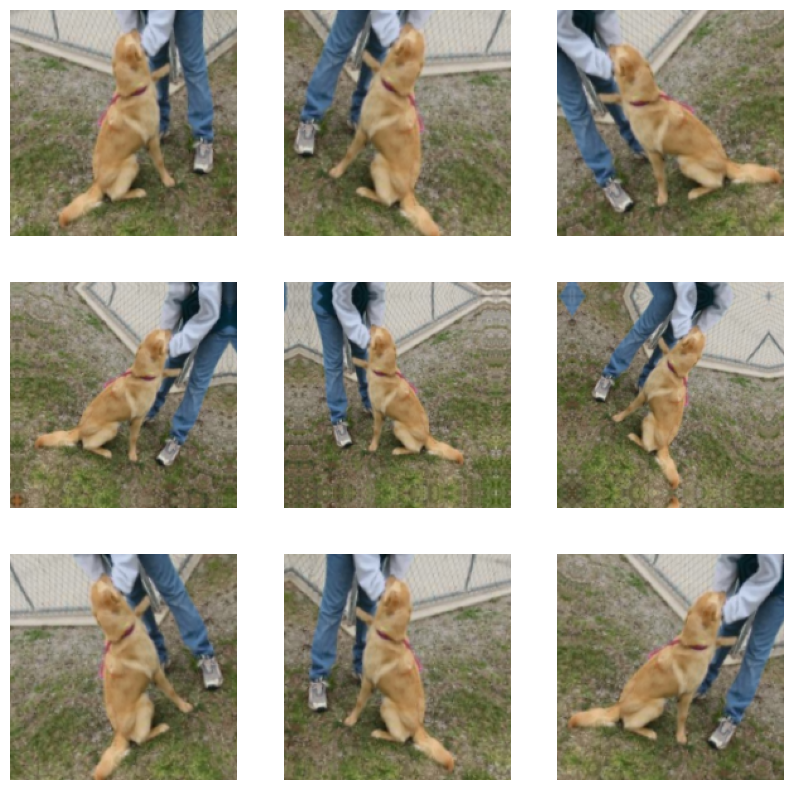

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
history = model.fit(
    train_dataset_1,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
313/313 [==============================] - 19s 53ms/step - loss: 0.6848 - accuracy: 0.5617 - val_loss: 0.7183 - val_accuracy: 0.5250
Epoch 2/30
313/313 [==============================] - 18s 57ms/step - loss: 0.6081 - accuracy: 0.6694 - val_loss: 0.6047 - val_accuracy: 0.6990
Epoch 3/30
313/313 [==============================] - 18s 55ms/step - loss: 0.5285 - accuracy: 0.7388 - val_loss: 0.4593 - val_accuracy: 0.8030
Epoch 4/30
313/313 [==============================] - 17s 55ms/step - loss: 0.4611 - accuracy: 0.7809 - val_loss: 0.4226 - val_accuracy: 0.8040
Epoch 5/30
313/313 [==============================] - 17s 52ms/step - loss: 0.4015 - accuracy: 0.8180 - val_loss: 0.3282 - val_accuracy: 0.8560
Epoch 6/30
313/313 [==============================] - 18s 55ms/step - loss: 0.3456 - accuracy: 0.8480 - val_loss: 0.2415 - val_accuracy: 0.8990
Epoch 7/30
313/313 [==============================] - 16s 52ms/step - loss: 0.2997 - accuracy: 0.8709 - val_loss: 0.2595 - val_accuracy:

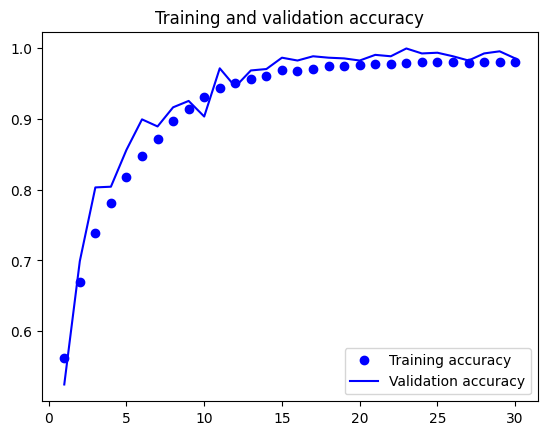

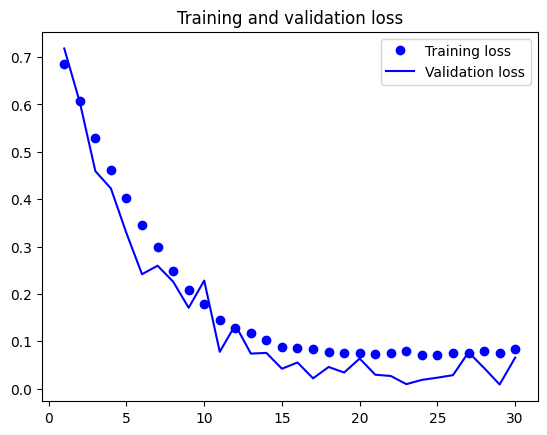

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_1)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.8913 - accuracy: 0.8930
Test accuracy: 0.893


**Model 3: Increasing the Training sample size to 10000**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory


make_subset("train_4", start_index=0, end_index=10000)
make_subset("validation_4", start_index=10000, end_index=10500)
make_subset("test_4", start_index=10500, end_index=11000)

train_dataset_4 = image_dataset_from_directory(
    new_base_dir / "train_4",
    image_size=(180, 180),
    batch_size=32)
validation_dataset_4 = image_dataset_from_directory(
    new_base_dir / "validation_4",
    image_size=(180, 180),
    batch_size=32)
test_dataset_4 = image_dataset_from_directory(
    new_base_dir / "test_4",
    image_size=(180, 180),
    batch_size=32)

Found 20000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


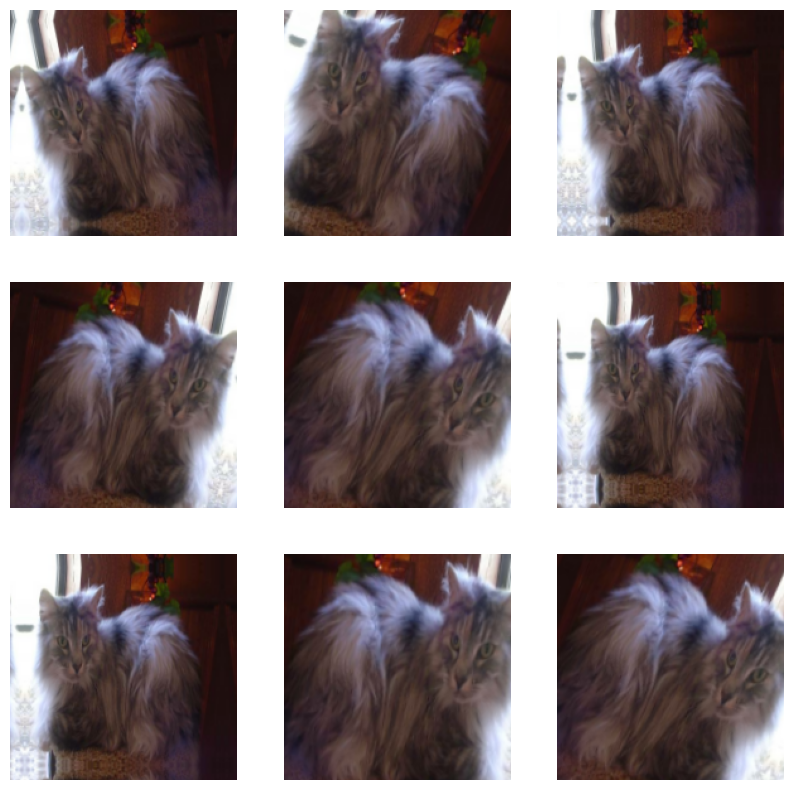

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"), early_stopping_monitor
]
history = model.fit(
    train_dataset_4,
    epochs=30,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/30
625/625 [==============================] - 74s 115ms/step - loss: 0.0999 - accuracy: 0.9663 - val_loss: 0.1443 - val_accuracy: 0.9780
Epoch 2/30
625/625 [==============================] - 72s 114ms/step - loss: 0.0885 - accuracy: 0.9710 - val_loss: 0.1558 - val_accuracy: 0.9730
Epoch 3/30
625/625 [==============================] - 72s 114ms/step - loss: 0.0834 - accuracy: 0.9730 - val_loss: 0.1994 - val_accuracy: 0.9680
Epoch 4/30
625/625 [==============================] - 74s 118ms/step - loss: 0.0806 - accuracy: 0.9756 - val_loss: 0.1637 - val_accuracy: 0.9770
Epoch 5/30
625/625 [==============================] - 72s 115ms/step - loss: 0.0725 - accuracy: 0.9770 - val_loss: 0.1591 - val_accuracy: 0.9820
Epoch 6/30
625/625 [==============================] - 72s 114ms/step - loss: 0.0740 - accuracy: 0.9785 - val_loss: 0.1449 - val_accuracy: 0.9790
Epoch 7/30
625/625 [==============================] - 72s 114ms/step - loss: 0.0702 - accuracy: 0.9777 - val_loss: 0.1721 - val_ac

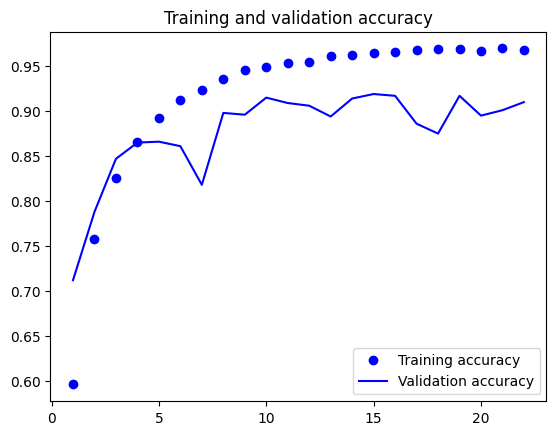

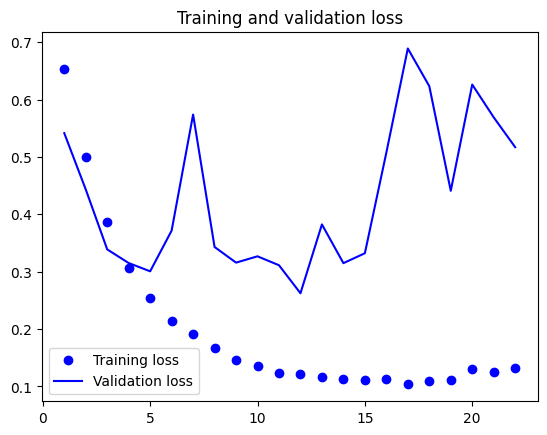

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset_4)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 32ms/step - loss: 0.2858 - accuracy: 0.9030
Test accuracy: 0.903


**Feature extraction together with data augmentation**

**Instantiating and freezing the VGG16 convolutional base**

**Pre-Trained Model - 1000 Training samples**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 19s 204ms/step - loss: 3.7083 - accuracy: 0.7605 - val_loss: 0.8708 - val_accuracy: 0.9100
Epoch 2/30
63/63 [==============================] - 12s 193ms/step - loss: 1.0318 - accuracy: 0.8840 - val_loss: 0.5052 - val_accuracy: 0.9450
Epoch 3/30
63/63 [==============================] - 12s 194ms/step - loss: 0.6660 - accuracy: 0.9075 - val_loss: 0.3819 - val_accuracy: 0.9580
Epoch 4/30
63/63 [==============================] - 12s 194ms/step - loss: 0.4186 - accuracy: 0.9365 - val_loss: 0.2863 - val_accuracy: 0.9560
Epoch 5/30
63/63 [==============================] - 12s 194ms/step - loss: 0.2722 - accuracy: 0.9415 - val_loss: 0.2323 - val_accuracy: 0.9590
Epoch 6/30
63/63 [==============================] - 12s 189ms/step - loss: 0.2067 - accuracy: 0.9505 - val_loss: 0.2346 - val_accuracy: 0.9620
Epoch 7/30
63/63 [==============================] - 10s 160ms/step - loss: 0.2100 - accuracy: 0.9565 - val_loss: 0.2011 - val_accuracy: 0.9650

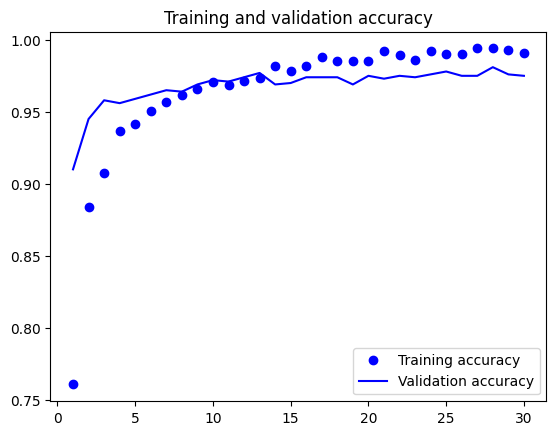

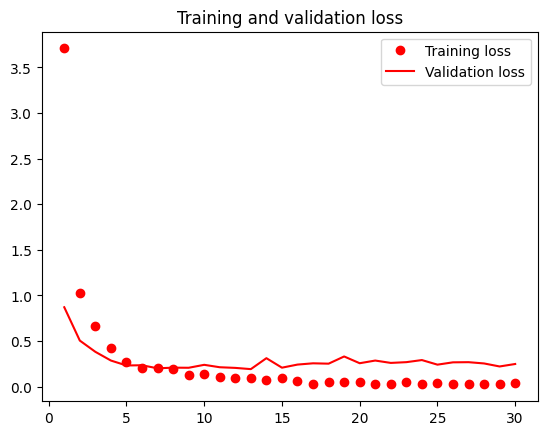

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 87ms/step - loss: 0.1919 - accuracy: 0.9790
Test accuracy: 0.979


**Pre-Trained Model - 5000 Training samples**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset_1,
    epochs=10,
    validation_data=validation_dataset_1,
    callbacks=callbacks)

Epoch 1/10
313/313 [==============================] - 40s 120ms/step - loss: 1.3285 - accuracy: 0.8718 - val_loss: 0.1794 - val_accuracy: 0.9630
Epoch 2/10
313/313 [==============================] - 38s 120ms/step - loss: 0.2468 - accuracy: 0.9331 - val_loss: 0.1099 - val_accuracy: 0.9720
Epoch 3/10
313/313 [==============================] - 38s 120ms/step - loss: 0.1606 - accuracy: 0.9495 - val_loss: 0.0961 - val_accuracy: 0.9710
Epoch 4/10
313/313 [==============================] - 37s 118ms/step - loss: 0.1191 - accuracy: 0.9579 - val_loss: 0.1023 - val_accuracy: 0.9750
Epoch 5/10
313/313 [==============================] - 37s 118ms/step - loss: 0.1084 - accuracy: 0.9672 - val_loss: 0.1482 - val_accuracy: 0.9680
Epoch 6/10
313/313 [==============================] - 37s 118ms/step - loss: 0.0910 - accuracy: 0.9712 - val_loss: 0.1293 - val_accuracy: 0.9790
Epoch 7/10
313/313 [==============================] - 37s 118ms/step - loss: 0.0823 - accuracy: 0.9701 - val_loss: 0.1598 - val_ac

In [ ]:
model = keras.models.load_model("fine_tuning2.keras")
test_loss, test_acc = model.evaluate(test_dataset_1)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 88ms/step - loss: 0.1381 - accuracy: 0.9730
Test accuracy: 0.973


**Pre-Trained Model - 10000 samples**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset_4,
    epochs=10,
    validation_data=validation_dataset_4,
    callbacks=callbacks)

Epoch 1/10
625/625 [==============================] - 77s 119ms/step - loss: 0.7467 - accuracy: 0.9033 - val_loss: 0.1679 - val_accuracy: 0.9660
Epoch 2/10
625/625 [==============================] - 74s 118ms/step - loss: 0.1456 - accuracy: 0.9492 - val_loss: 0.1527 - val_accuracy: 0.9720
Epoch 3/10
625/625 [==============================] - 72s 114ms/step - loss: 0.1140 - accuracy: 0.9613 - val_loss: 0.1329 - val_accuracy: 0.9760
Epoch 4/10
625/625 [==============================] - 72s 114ms/step - loss: 0.1000 - accuracy: 0.9675 - val_loss: 0.1659 - val_accuracy: 0.9750
Epoch 5/10
625/625 [==============================] - 72s 114ms/step - loss: 0.0845 - accuracy: 0.9699 - val_loss: 0.2172 - val_accuracy: 0.9720
Epoch 6/10
625/625 [==============================] - 71s 114ms/step - loss: 0.0850 - accuracy: 0.9727 - val_loss: 0.1846 - val_accuracy: 0.9730
Epoch 7/10
625/625 [==============================] - 72s 114ms/step - loss: 0.0803 - accuracy: 0.9747 - val_loss: 0.1721 - val_ac

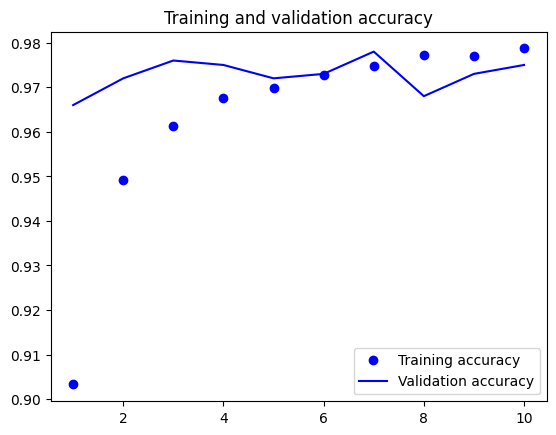

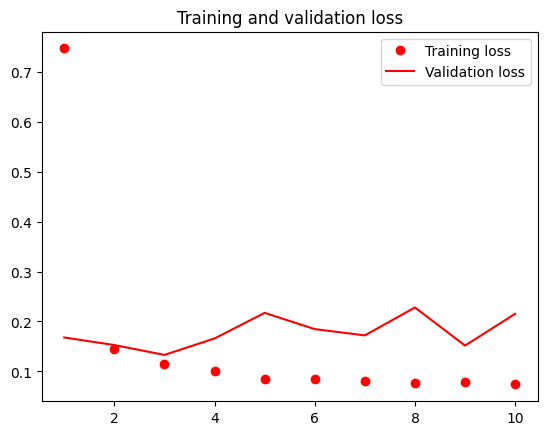

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("fine_tuning3.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 87ms/step - loss: 0.0719 - accuracy: 0.9810
Test accuracy: 0.981
